Accuracy: 0.4090909090909091
Classification Report:
                precision    recall  f1-score   support

          LLAJ       0.50      0.17      0.25         6
     Pelayaran       0.00      0.00      0.00         5
   Penerbangan       0.71      0.71      0.71         7
Perkeretaapian       0.30      0.75      0.43         4

      accuracy                           0.41        22
     macro avg       0.38      0.41      0.35        22
  weighted avg       0.42      0.41      0.37        22


Urutan Moda Transportasi Teraman Berdasarkan Prediksi Model:
Perkeretaapian: 25 kali
Penerbangan: 18 kali
Pelayaran: 16 kali
LLAJ: 13 kali

Kesimpulan: Moda transportasi yang paling aman saat mudik berdasarkan model adalah Perkeretaapian dengan 25 prediksi.


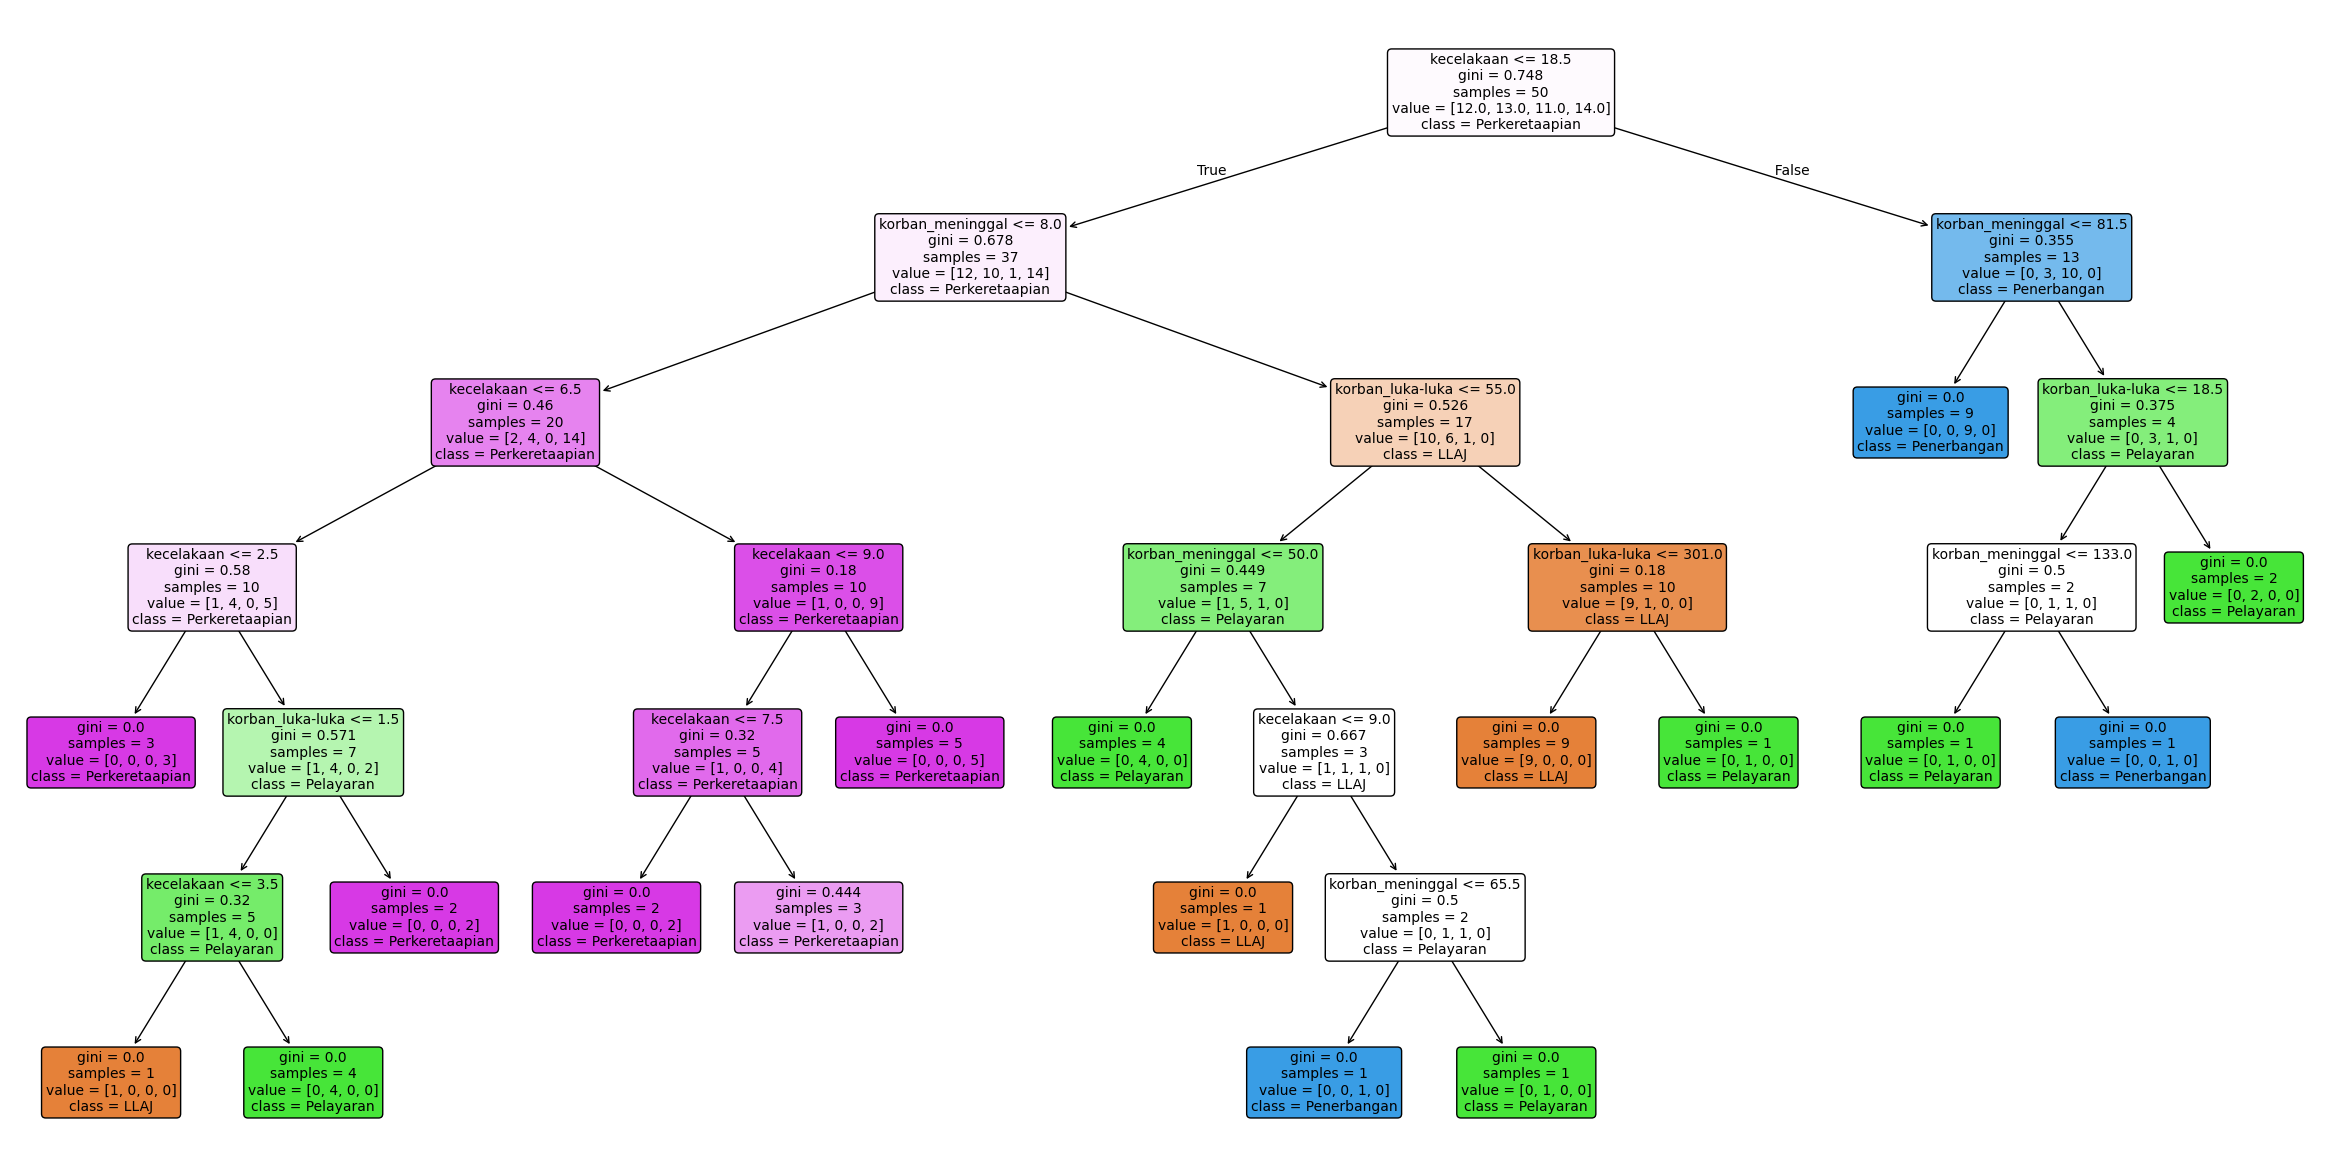

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree

# Load dataset
data = pd.read_excel('hasil_data_mining_revisi1.xlsx')

# Encoding categorical variable 'kategori' into numerical values
data['kategori_encoded'] = data['kategori'].map({
    'Moda LLAJ': 0, 
    'Moda Pelayaran': 1, 
    'Moda Penerbangan': 2, 
    'Moda Perkeretaapian': 3
})

# Define features (X) and target (y)
X = data[['kecelakaan', 'korban_luka-luka', 'korban_meninggal']]
y = data['kategori_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['LLAJ', 'Pelayaran', 'Penerbangan', 'Perkeretaapian'])

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Get the predicted values for all data to compute mode safety
predicted_modes = model.predict(X)

# Map the predicted numerical categories back to the corresponding transportation modes
mode_labels = ['LLAJ', 'Pelayaran', 'Penerbangan', 'Perkeretaapian']
predicted_mode_labels = [mode_labels[pred] for pred in predicted_modes]

# Count how many times each mode was predicted
mode_counts = pd.Series(predicted_mode_labels).value_counts()

# Sort the modes by their frequency in the predictions (more frequent means safer mode)
sorted_mode_counts = mode_counts.sort_values(ascending=False)

# Display the sorted modes with their respective counts
print("\nUrutan Moda Transportasi Teraman Berdasarkan Prediksi Model:")
for mode, count in sorted_mode_counts.items():
    print(f"{mode}: {count} kali")

# Kesimpulan kendaraan teraman
most_safe_mode = sorted_mode_counts.idxmax()
most_safe_count = sorted_mode_counts.max()

print(f"\nKesimpulan: Moda transportasi yang paling aman saat mudik berdasarkan model adalah {most_safe_mode} dengan {most_safe_count} prediksi.")

# Visualisasi Decision Tree
plt.figure(figsize=(30, 15))
tree.plot_tree(model, 
               feature_names=['kecelakaan', 'korban_luka-luka', 'korban_meninggal'], 
               class_names=['LLAJ', 'Pelayaran', 'Penerbangan', 'Perkeretaapian'], 
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.show()
